In [23]:
import numpy as np

# generate distribution over the number of events in n_windows independent windows
# 
# the maximal number of events per site is n_label-1 
# the maximal total number of events is (n_labels-1)*n_windows

n_windows = 100
n_labels = 50  

p_count = np.random.uniform(low=0,high=1,size=(n_labels,n_windows))
p_count = p_count / np.sum( p_count, axis=0)

print(p_count)

[[0.02000783 0.02549021 0.03222796 ... 0.01298398 0.02428337 0.01666749]
 [0.03086737 0.02091278 0.00797602 ... 0.02280265 0.03361561 0.00539579]
 [0.01224119 0.02897986 0.02366274 ... 0.02920808 0.00316631 0.02848092]
 ...
 [0.01165456 0.03189645 0.01622944 ... 0.0069341  0.01683388 0.01345418]
 [0.00425869 0.03458027 0.01688815 ... 0.02351555 0.00422891 0.00800561]
 [0.00307823 0.02260736 0.00338942 ... 0.0228687  0.0303374  0.0040425 ]]


2462


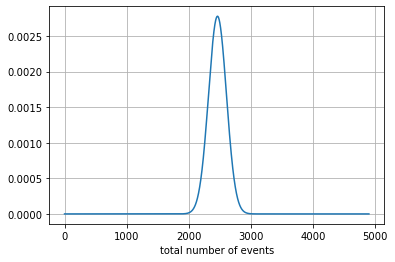

In [20]:
from scipy.special import logsumexp
import matplotlib.pyplot as plt

def total_count_distribution( p_count ):
    """ 
    Input:
      p_c [n_labels x n_windows] 
    Output:
      distr [n_windows*(n_labels-1)] distr[c] is the probability 
        that the total number of events is c 
    """

    n_labels, n_windows = p_count.shape

    log_p_count = np.log( p_count )
    log_P = np.zeros(((n_labels-1)*n_windows+1, n_windows ))
    log_P.fill( np.NINF )

    for s in range(n_labels):
        log_P[s,n_windows-1] = np.log( p_count[s,n_windows-1])
        
    for i in range( n_windows-2,-1,-1 ):
        for s in range( (n_windows-i)*(n_labels-1)+1 ):
            a = []
            for c in range( max(s-(n_windows-i-1)*(n_labels-1), 0), min(n_labels, s+1 ) ):
                a.append( log_p_count[c,i] + log_P[s-c,i+1])
            log_P[s,i] = logsumexp( a )

    return np.exp(log_P[:,0]) 


distr = total_count_distribution( p_count )

plt.figure()
plt.plot( distr )
plt.grid('on')
plt.xlabel('total number of events')

print(np.argmax( distr ))

In [24]:
# argmax inference
pred_labels = np.argmax( p_count, axis=0)
pred_count_indep_map = np.sum( pred_labels )

# optimal RVCE predictor
max_total_count = (n_labels-1)*n_windows
rvce_risk = np.zeros( max_total_count )
count_range = np.arange( 1, max_total_count+1 )
for c in range( 1, max_total_count+1 ):
    rvce_risk[c-1] = np.sum(  distr[1:]*np.abs(count_range-c)/count_range  )

pred_count_rvce = np.argmin( rvce_risk ) + 1
pred_count_map = np.argmax( distr )

print( pred_count_rvce )
print( pred_count_map )
print( pred_count_indep_map )


2454
2462
2319
